In [146]:
#Relationship between congenital defects and vaccinnations 

import pandas as pd
file_name = pd.DataFrame
def read_csv(file_path:str,file_name, column_title= '', rows=0):
    file_name = pd.read_csv(file_path, comment="#", skiprows=rows)
    file_name[column_title]= file_name[column_title].astype(int)
    #print(file_name.head())

def read_file(file_path:str,file_name, column_title= '', rows=0):
    try:
        file_name = pd.read_excel(file_path, comment="#", skiprows=rows,engine="openpyxl", header = rows)
        file_name[column_title]= pd.to_datetime(file_name[column_title],  format='%b-%y')
        #print(file_name.head())

    except:
        file_name = pd.read_csv(file_path, comment="#", skiprows=rows)
        file_name[column_title]= pd.to_datetime(file_name[column_title],  format='%b-%y')
        #print(file_name.head())    


'''

data_wildfires = pd.read_excel("3210010901-symbolsSeparate.xlsx",usecols="A:F", engine="openpyxl", header = 4)
#the above code does not work when the actual excel file is open- this is because the file would be read-locked by another program
'''
dairy_data = pd.DataFrame()
#read_file("Concentrated milk in Canada.csv", dairy_data, column_title="Reference period", rows=12)

Milk_data = pd.read_csv("Concentrated milk in Canada.csv", comment = "#", skiprows = 12)


Milk_data[['Month', 'Year']]= Milk_data["Reference period"].str.split("-", n=1, expand=True)

Milk_data['Year'] = pd.to_numeric(Milk_data['Year'], errors= 'coerce').fillna(0).astype(int)

Milk_data.loc[Milk_data['Year']>50, 'Year'] += 1900
Milk_data.loc[Milk_data['Year']<50, 'Year'] += 2000

Milk_data.convert_dtypes()
Milk_data.head()

,Reference period,Total Supply,Beginning stocks,Production,Imports,Total Disappearance,Exports,Domestic disappearance,Month,Year
0,Jan-76,"20,624","14,750","5,874",0,"7,019",1,"7,018",Jan,1976
1,Feb-76,"18,006","13,606","4,399",0,"9,283",0,"9,283",Feb,1976
2,Mar-76,"15,939","8,722","7,217",0,"7,060",0,"7,060",Mar,1976
3,Apr-76,"17,193","8,877","8,315",0,"9,680",0,"9,680",Apr,1976
4,May-76,"17,937","7,513","10,425",0,"7,531",19,"7,512",May,1976


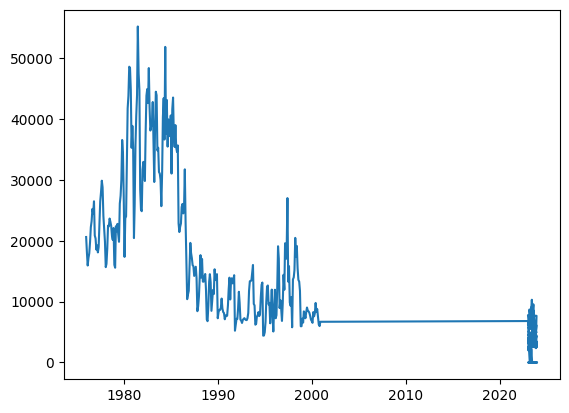

In [157]:
import matplotlib.pyplot as plt
Milk_excel= pd.read_excel("Concentrated milk in Canada.xlsx", comment = "#", skiprows = 12, nrows=571).fillna(0)
Milk_excel.head()


plt.plot(Milk_excel["Reference period"],Milk_excel["Total Supply"] )

In [144]:
Milk_data['Year'] = Milk_data['Year'].astype(int)

#convert data values from string to integers
Milk_data['Total Supply']= Milk_data['Total Supply'].str.replace(',', '')
Milk_data['Beginning stocks']= Milk_data['Beginning stocks'].str.replace(',', '')
Milk_data['Production']= Milk_data['Production'].str.replace(',', '')
Milk_data['Domestic disappearance']= Milk_data['Domestic disappearance'].str.replace(',', '')
Milk_data['Total Disappearance']= Milk_data['Total Disappearance'].str.replace(',', '')

Milk_data['Total Supply']= Milk_data['Total Supply'].astype(int)
'''
Milk_data['Total Supply']=Milk_data['Total Supply'].fillna('0')
Milk_data['Total Supply']=Milk_data['Total Supply'].astype(int)
pd.to_numeric(df['Column1'], errors='coerce', downcast='integer')
'''

Milk_data.head()

ValueError: cannot convert float NaN to integer

TypeError: 'value' must be an instance of str or bytes, not a float

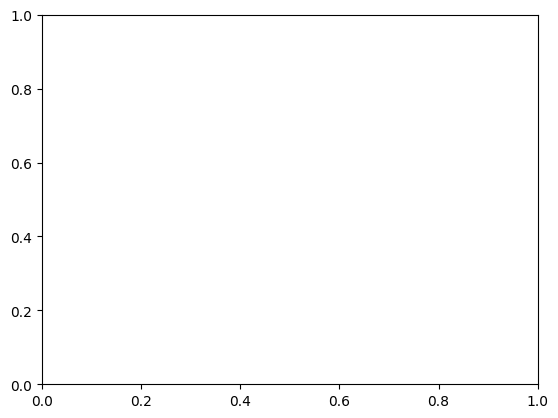

In [127]:
import matplotlib.pyplot as plt
plt.plot(Milk_data['Year'],Milk_data['Imports'], color = "blue", marker = "o", label= "Total Supply of concentrated whole milk")

#New_milk = Milk_data.groupby('Year')['Total Supply'].mean()
#New_milk.head()


In [132]:
import pandas as pd
import matplotlib.pyplot as plt
dairy_data = pd.read_csv("3210010901-symbolsSeparate.csv", comment="#", skiprows =9)
dairy_data["Years"] = pd.to_datetime(dairy_data['Years'] + ' 1', format='%B %Y %d')
dairy_data["Concentrated whole milk"] = dairy_data["Concentrated whole milk"].interpolate()
dairy_data.head()





C:\Users\china\AppData\Local\Temp\ipykernel_36652\1292567721.py:5: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dairy_data["Concentrated whole milk"] = dairy_data["Concentrated whole milk"].interpolate()


,Years,Creamery butter,Unnamed: 2,Other cheese (whole milk and cream),Unnamed: 4,Concentrated whole milk,Unnamed: 6,Sweetened concentrated milk,Unnamed: 8
0,1976-01-01,"42,057",NaN,"12,330",NaN,"20,624",NaN,998,NaN
1,1976-02-01,"41,159",NaN,"11,867",NaN,"18,006",NaN,842,NaN
2,1976-03-01,"41,036",NaN,"13,094",NaN,"15,939",NaN,"1,069",NaN
3,1976-04-01,"41,322",NaN,"11,868",NaN,"17,193",NaN,"1,197",NaN
4,1976-05-01,"43,578",NaN,"12,227",NaN,"17,937",NaN,"1,013",NaN


Text(0.5, 1.0, 'Supply of Dairy produce Across the Years in Canada')

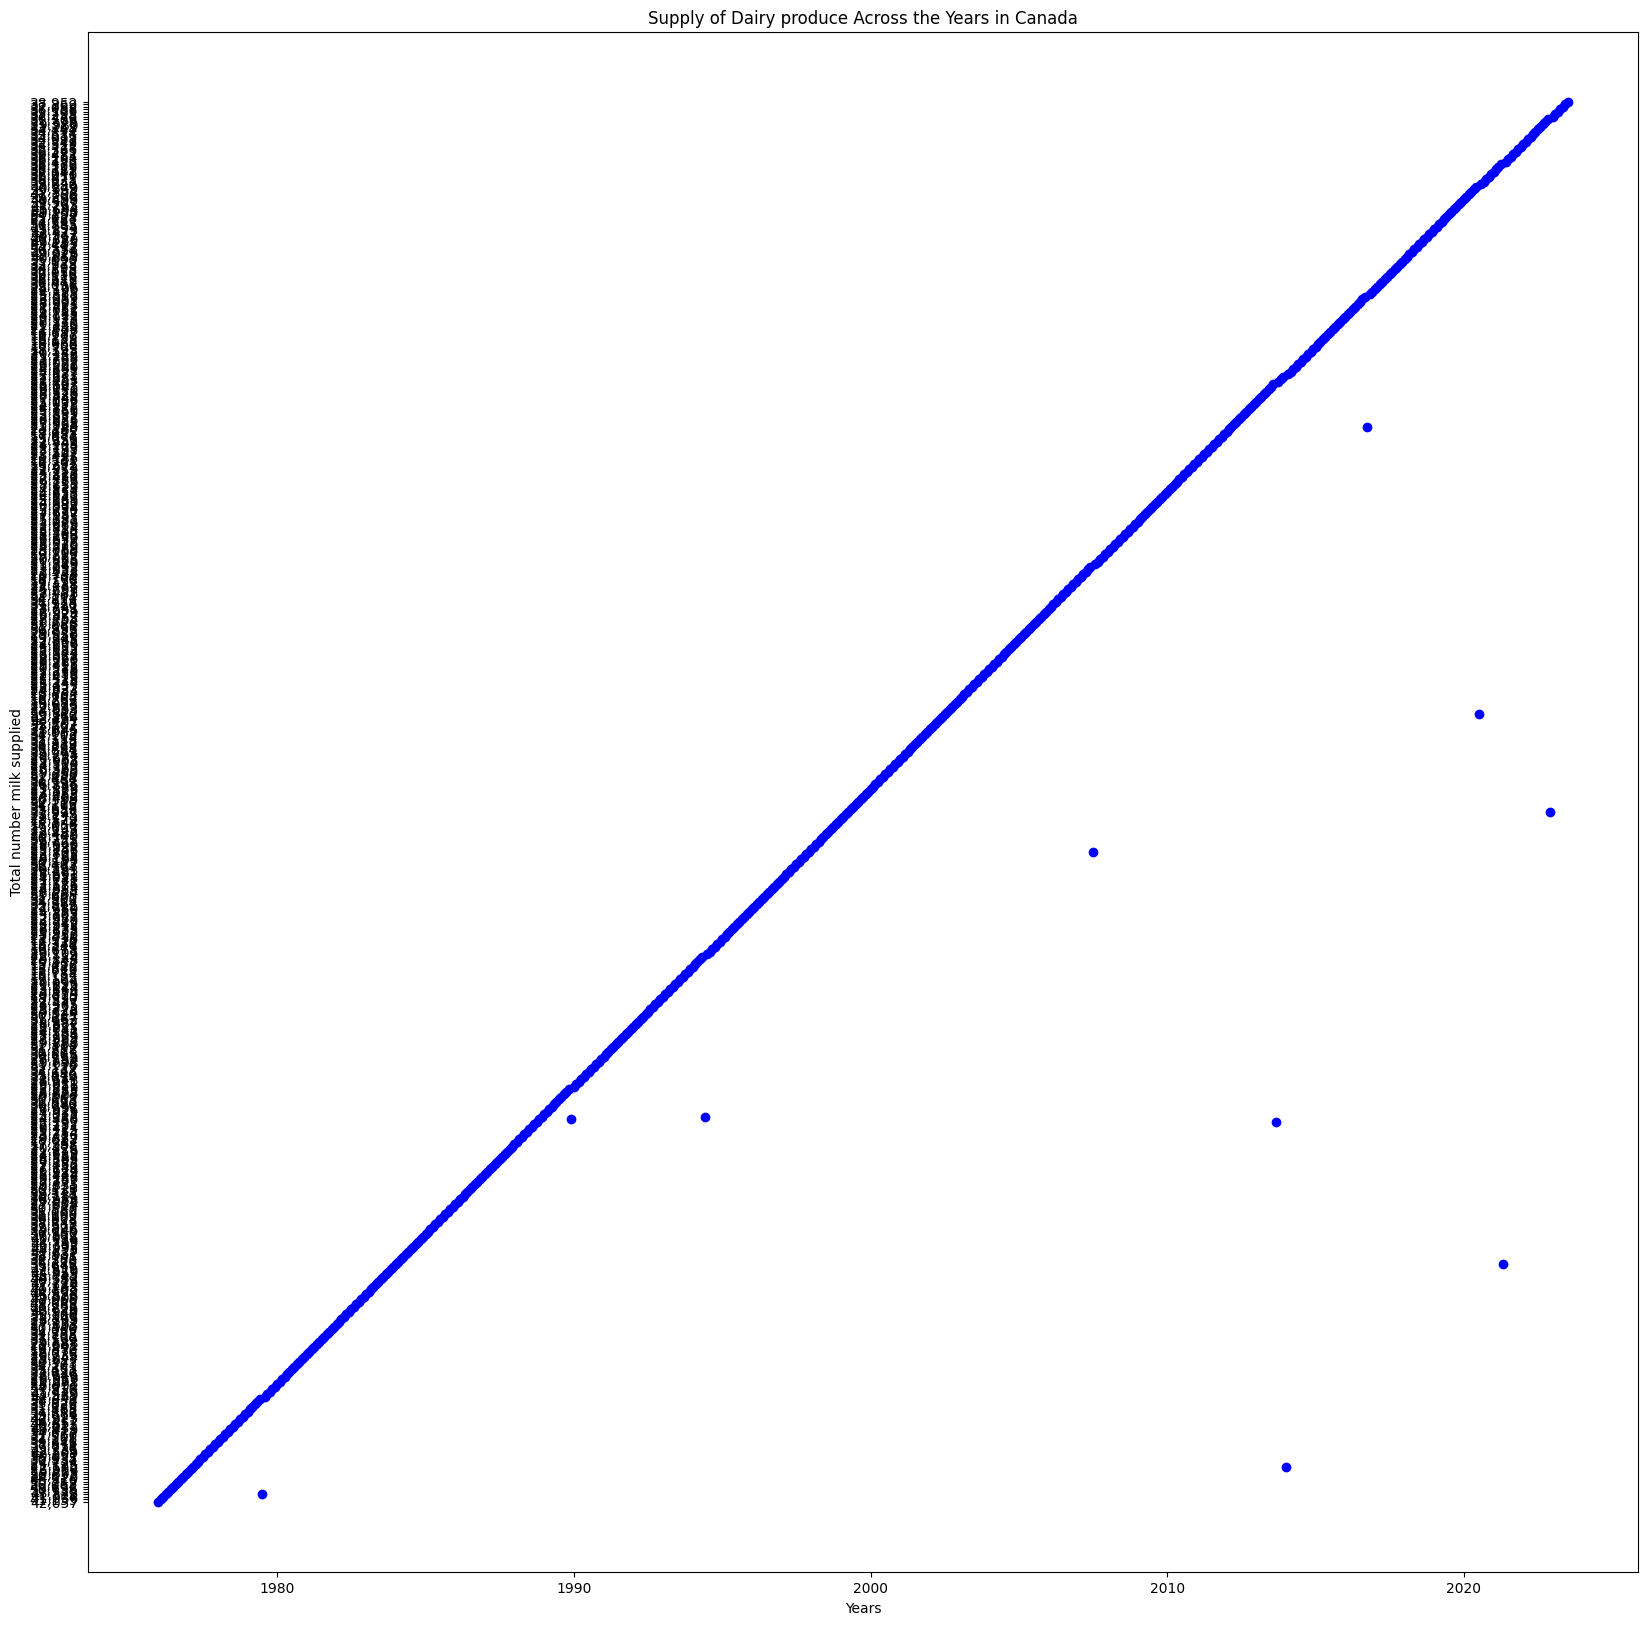

In [135]:
fig, plot1 = plt.subplots(figsize = (20,20) ) 

plot1.scatter(dairy_data["Years"], dairy_data["Creamery butter"], color = "blue", marker = "o", label= "Concentrated whole milk")
plot1.set_xlabel("Years")
plot1.set_ylabel("Total number milk supplied")
plot1.set_title("Supply of Dairy produce Across the Years in Canada")

#plot the average annual trend
#find the annual average data


TypeError: agg function failed [how->mean,dtype->object]

In [56]:
dairy_data['Years'].loc["1976-01-01"]

KeyError: '1976-01-01'

In [ ]:
import matplotlib.pyplot as plt

def SubPlot(plot1, plot2,x_val, y_val, hue= "blue", name="", x_label=" ", y_label=" ", title = ""):
    fig, plot1 = plt.subplots(figsize = (20,20) ) 
    plot1.scatter(x_val, y_val, color = hue, label = name)
    plot1.set_xlabel(x_label)
    plot1.set_ylabel(y_label)
    plot2.set_title(title)

    plot2 = plot1.twinx()
    


fig, plot1 = plt.subplots(figsize = (20,20))

plot1.scatter(annual_co2['year'], annual_co2["mean"], color = 'blue', label = "annual CO2")
plot1.set_xlabel('Years')
plot1.set_ylabel('Average Annual CO2 (ppm)')




#create a secondary y-axis and plot the line data
plot2= plot1.twinx() #create a secondary y-axis sharing the same x-axis-this prevents the line plot from sitting on the x-axis
plot2.plot(data_wildfires['YEAR'], data_wildfires["TOTAL_HA"], color= "black", marker = 'o', label="Area burned")
plot2.set_ylabel("Total Area burned (millions of hectares0")

#Set graph details
plot1.set_title("Average CO2 and Areas Burned in Canada by Year")
plot1.grid(True)
plot1.legend(loc= "upper right")
plot2.legend(loc= "upper left")

#save plot as png
plt.savefig("CO2_and_Areas_Burned.png", dpi=300, bbox_inches = 'tight')


In [39]:
import pandas as pd
immigrant_data = pd.read_csv("1710001401-symbolsSeparate.csv", comment = "#", skiprows = 13)
immigrant_data.head()
#immigrant_data['first_year'] = immigrant_data['Years'].str.split('/').str[0].astype(int)
immigrant_data.head()


,Years,1 to 17 years,18 years and above
0,1975 / 1976,"55,447","114,581"
1,1976 / 1977,"40,328","90,603"
2,1977 / 1978,"29,022","71,945"
3,1978 / 1979,"24,303","60,215"
4,1979 / 1980,"45,688","98,137"


Exposure to teratogens are a leading cause in birth defects across the world. 
Create an excel file with the data sources showing the number of birth defects, the type of defects and the gaes of the mother.

Next data set to look at : vaccination/ immunization data over the years
look at the increase in da

In [8]:
import pandas as pd
school_data = pd.read_csv("3710001201-symbolsSeparate.csv", comment= "#",skiprows = 15)
school_data.head()


,Unnamed: 0,Number,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,1992,"235,932",NaN,"134,196",NaN,12,NaN,12,NaN,"29,442",...,"1,356",NaN,603,NaN,444,NaN,792,NaN,408,NaN
1,1993,"243,663",NaN,"139,317",NaN,24,NaN,15,NaN,"30,039",...,"1,443",NaN,534,NaN,375,NaN,354,NaN,186,NaN
2,1994,"250,605",NaN,"143,853",NaN,9,NaN,6,NaN,"29,925",...,"1,683",NaN,525,NaN,390,NaN,138,NaN,66,NaN
3,1995,"257,301",NaN,"147,585",NaN,24,NaN,21,NaN,"30,156",...,"1,959",NaN,537,NaN,393,NaN,477,NaN,285,NaN
4,1996,"263,598",NaN,"152,367",NaN,12,NaN,12,NaN,"29,523",...,"2,439",NaN,966,NaN,666,NaN,129,NaN,78,NaN
